In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

plt.style.use('seaborn-v0_8')
plt.rcParams['legend.framealpha'] = 1  ## disable any default legend frame transparency from the style

dirpath_data = Path('/home/lain/root/100_work/110_projects/111_mars/code-repos/redplanet/scrap/250408_modlab_nmr/exp_modern_phys_388/nmr/nmr_data')

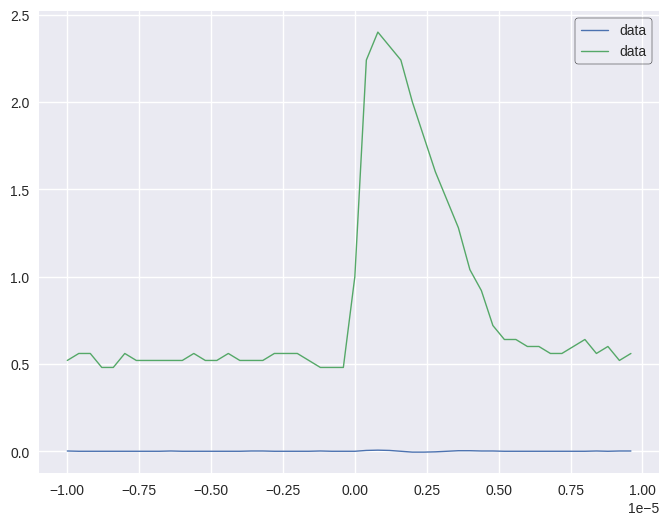

In [2]:
'''load data'''

fname = 'zero-crossing/zero-crossing-tau-0.034s.csv'

fpath = dirpath_data / fname
df = pd.read_csv(
    fpath,
    usecols = [3,4,9,10],
    header = None,
    names = ['t1', 'v1', 't2', 'v2'],
    ## note: t1 and v1 look fucked up / meaningless, just ignore those p sure?
)



'''crop & scale'''

df['t1'] *= 0.009999999747
df['v1'] *= 0.2000000095


df['t2'] *= 0.009999999747
df['v2'] *= 0.999999977648

df = df[
    (df['t2'] > -0.00001) &
    (df['t2'] <  0.00001)
]



'''convert to 1D numpy arrays for convenience'''
dat_t = df['t2'].to_numpy()
dat_v = df['v2'].to_numpy()




'''plot'''

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(
    df['t1'],
    df['v1'],
    label = 'data',
    # alpha = 0.5,
    linewidth = 1,
)


ax.plot(
    dat_t,
    dat_v,
    label = 'data',
    # alpha = 0.5,
    linewidth = 1,
)

legend = ax.legend(
    # loc='lower left',
    frameon=True,
)
frame = legend.get_frame()
frame.set_alpha(None)  ## disable any rcParam alpha override
frame.set_facecolor((1, 1, 1, 0.1))  ## set frame coloring to white with some transparency
frame.set_edgecolor('black')

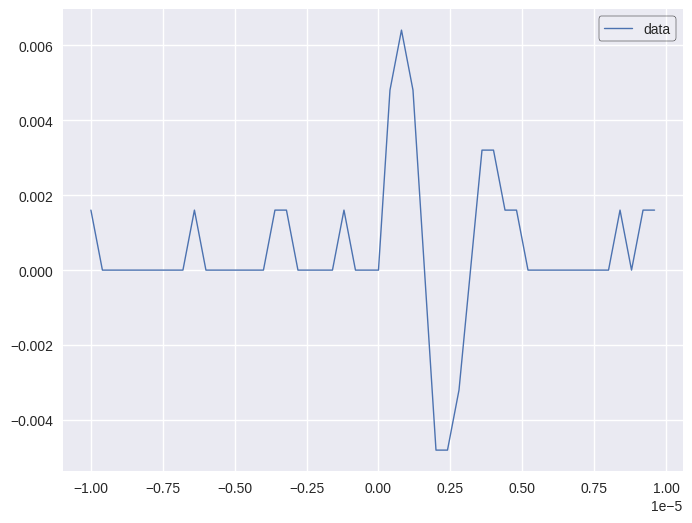

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(
    df['t1'],
    df['v1'],
    label = 'data',
    # alpha = 0.5,
    linewidth = 1,
)



legend = ax.legend(
    # loc='lower left',
    frameon=True,
)
frame = legend.get_frame()
frame.set_alpha(None)  ## disable any rcParam alpha override
frame.set_facecolor((1, 1, 1, 0.1))  ## set frame coloring to white with some transparency
frame.set_edgecolor('black')